# Upper bound of the coverage
## Under the homogeneous pairs model

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import sys, os
sys.path.append('../pairedRS')

In [2]:
import numpy as np   
import pandas as pd
import pdb
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
from tqdm import tqdm
import sys

In [51]:
from utils import *     # contains some useful helper functions 
from models import *    # toy models
from solvers import *   # matrix completion solvers
from methods import *

In [52]:
from upper_bound_numerical import *
from upper_bound_class import *

In [53]:
n1 = 100
n2 = 100
r_true = 3
r_guess = 3
prob_obs = 0.3
gamma_n = 0.5
gamma_m = 0.9
noise_model = 'step'
a = 1
b = 1
mu = 10
seed = 1

max_test_pairs = 1000            # Maximum number of test pairs
matrix_generation_seed = 2023    # Data matrix is fixed
repetition = 100                 # Number of repetitions
verbose = True

methods = ["conformal",
           "naive",
           "bonferroni",
           "uncorrected"]
model = "RFM"
solver = "pmf"

# Other parameters
size_obs = int(n1 * n2 * prob_obs)
n_calib_pairs = int(size_obs//4)

allow_inf = False
alpha = 0.1

mm = RandomFactorizationModel(n1 ,n2, r_true)
U, V, M_true = mm.sample_noiseless(matrix_generation_seed)

In [54]:
results = pd.DataFrame({})
for i in tqdm(range(repetition), desc="Repetitions", leave=True, position=0):
    random_state = repetition * seed + i

    res = run_single_experiment_max_weight(M_true, alpha, size_obs, n_calib_pairs, max_test_pairs, 
                          r_true, r_guess, gamma_n=gamma_n, gamma_m=gamma_m, noise_model=noise_model, a=a, b=b, mu=mu,
                          random_state=random_state)
    
    results = pd.concat([results, res])

Repetitions: 100%|██████████| 100/100 [00:03<00:00, 28.32it/s]


In [56]:
results.mean()

max_weight    0.002175
dtype: float64

In [24]:
results

,max_weight
0,0.002172
0,0.001995
0,0.002140
0,0.002374
0,0.002016
...,...
0,0.002365
0,0.001934
0,0.002187
0,0.002188


In [25]:
results.mean()

max_weight    0.002175
dtype: float64

Therefore, we can see that under the homogeneous pairs model, $\mathbb{E}{\max_{1,\ldots,n+1} p^w_i({X}_{1}, \dots, {X}_{n+1})}$ is very small.

## How does it change with parameters?

### Different number of calibration pairs

In [57]:
n1 = 100
n2 = 100
r_true = 3
r_guess = 3
prob_obs = 0.3
gamma_n = 0.5
gamma_m = 0.9
noise_model = 'step'
a = 1
b = 1
mu = 10
seed = 1

max_test_pairs = 1000            # Maximum number of test pairs
matrix_generation_seed = 2023    # Data matrix is fixed
repetition = 100                 # Number of repetitions
verbose = True

methods = ["conformal",
           "naive",
           "bonferroni",
           "uncorrected"]
model = "RFM"
solver = "pmf"

# Other parameters
size_obs = int(n1 * n2 * prob_obs)

allow_inf = False
alpha = 0.1

mm = RandomFactorizationModel(n1 ,n2, r_true)
U, V, M_true = mm.sample_noiseless(matrix_generation_seed)

In [71]:
n_calib_pairs_list = [int(size_obs*0.05), int(size_obs*0.10), int(size_obs*0.15),int(size_obs*0.20), int(size_obs*0.25)]

experiment_results = pd.DataFrame({})
for n_calib_pairs in n_calib_pairs_list:
    experiment_res = pd.DataFrame({})
    results = pd.DataFrame({})
    
    for i in tqdm(range(repetition), desc="Repetitions", leave=True, position=0):
        random_state = repetition * seed + i

        res = run_single_experiment_max_weight(M_true, alpha, size_obs, n_calib_pairs, max_test_pairs, 
                              r_true, r_guess, gamma_n=gamma_n, gamma_m=gamma_m, noise_model=noise_model, a=a, b=b, mu=mu,
                              random_state=random_state)
        
        results = pd.concat([results, res])
        
    avg_max_weight = results['max_weight'].mean()
    temp_df = pd.DataFrame({'n_calib_pairs': [n_calib_pairs], 'avg_max_weight': [avg_max_weight]})
    experiment_results = pd.concat([experiment_results, temp_df], ignore_index=True)

Repetitions: 100%|██████████| 100/100 [00:07<00:00, 14.17it/s]


In [72]:
experiment_results

,n_calib_pairs,avg_max_weight
0,150,0.010745
1,300,0.005415
2,450,0.003621
3,600,0.002717
4,750,0.002175


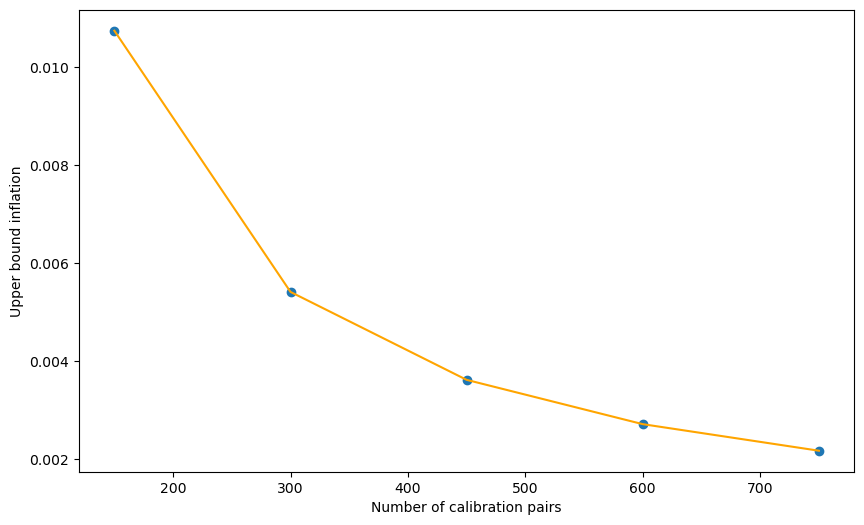

In [82]:
plt.rcParams["figure.figsize"] = (10,6)

plt.scatter(experiment_results["n_calib_pairs"], experiment_results["avg_max_weight"])
plt.plot(experiment_results["n_calib_pairs"], experiment_results["avg_max_weight"], label='Line Connect', linestyle='-', color='orange')
plt.xlabel("Number of calibration pairs")
plt.ylabel("Upper bound inflation")

plt.show()

### Different size of the matrix

In [83]:
r_true = 3
r_guess = 3
prob_obs = 0.3
gamma_n = 0.5
gamma_m = 0.9
noise_model = 'step'
a = 1
b = 1
mu = 10
seed = 1

max_test_pairs = 1000            # Maximum number of test pairs
matrix_generation_seed = 2023    # Data matrix is fixed
repetition = 100                 # Number of repetitions
verbose = True

methods = ["conformal",
           "naive",
           "bonferroni",
           "uncorrected"]
model = "RFM"
solver = "pmf"

In [85]:
n_list = [100, 150, 200]
experiment_results = pd.DataFrame({})

for matrix_size in n_list:
    n1 = matrix_size
    n2 = matrix_size
    size_obs = int(n1 * n2 * prob_obs)
    n_calib_pairs = int(size_obs//4)

    allow_inf = False
    alpha = 0.1

    mm = RandomFactorizationModel(n1 ,n2, r_true)
    U, V, M_true = mm.sample_noiseless(matrix_generation_seed)
    
    experiment_res = pd.DataFrame({})
    results = pd.DataFrame({})
    
    for i in tqdm(range(repetition), desc="Repetitions", leave=True, position=0):
        random_state = repetition * seed + i

        res = run_single_experiment_max_weight(M_true, alpha, size_obs, n_calib_pairs, max_test_pairs, 
                              r_true, r_guess, gamma_n=gamma_n, gamma_m=gamma_m, noise_model=noise_model, a=a, b=b, mu=mu,
                              random_state=random_state)
        
        results = pd.concat([results, res])
        
    avg_max_weight = results['max_weight'].mean()
    temp_df = pd.DataFrame({'matrix_size': [matrix_size], 'avg_max_weight': [avg_max_weight]})
    experiment_results = pd.concat([experiment_results, temp_df], ignore_index=True)

Repetitions: 100%|██████████| 100/100 [00:24<00:00,  4.08it/s]


In [86]:
experiment_results

,matrix_size,avg_max_weight
0,100,0.002175
1,150,0.000908
2,200,0.000489


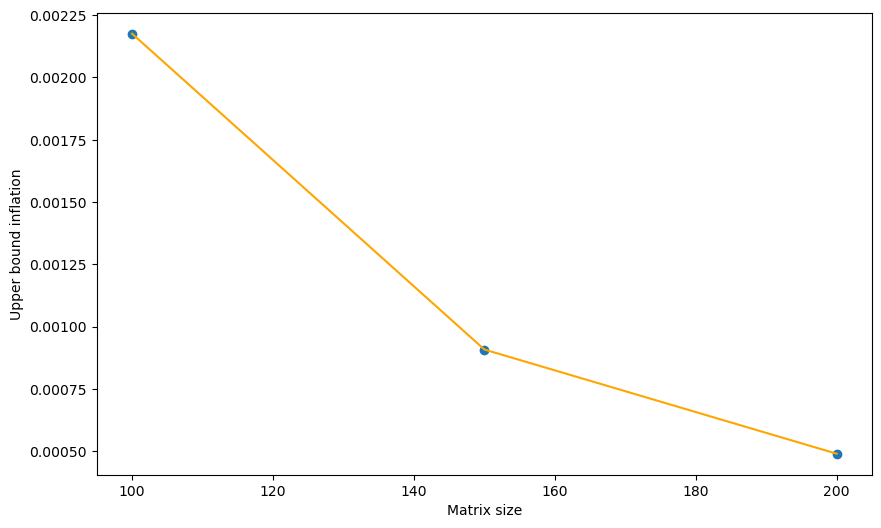

In [87]:
plt.rcParams["figure.figsize"] = (10,6)

plt.scatter(experiment_results["matrix_size"], experiment_results["avg_max_weight"])
plt.plot(experiment_results["matrix_size"], experiment_results["avg_max_weight"], label='Line Connect', linestyle='-', color='orange')
plt.xlabel("Matrix size")
plt.ylabel("Upper bound inflation")

plt.show()